In [1]:
import pandas as pd
data = pd.read_csv(".\datasets\Biomechanical_features\column_2c_weka.csv")
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


## Linear Regression

In [2]:
# create data1 that include pelvic_incidence that is feature and sacral_slop that is target variable
data1 = data[data['class'] == 'Abnormal']
data1.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [3]:
import numpy as np
x = np.array(data1.loc[:,'pelvic_incidence']).reshape(-1,1)
y = np.array(data1.loc[:,'sacral_slope']).reshape(-1,1)

Text(0, 0.5, 'sacral_slope')

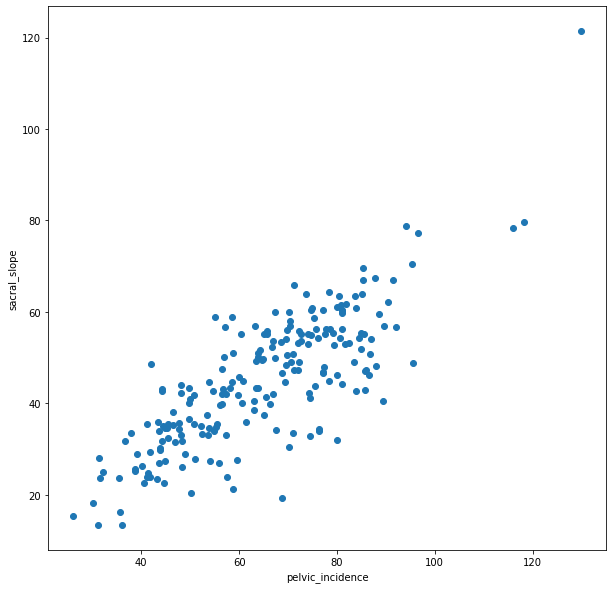

In [4]:
# scatter 
import matplotlib.pyplot as plt
plt.figure(figsize=[10,10])
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')

R^2 score:  0.6458410481075871


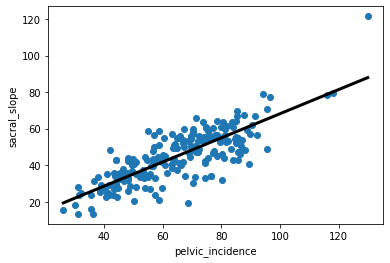

In [5]:
# LinearRegression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# Predict space
predict_space = np.linspace(min(x), max(x)).reshape(-1,1)
# Fit
reg.fit(x,y)
# Predict
predicted = reg.predict(predict_space)
# R^2
print("R^2 score: ", reg.score(x,y))
# Plot regression line and scatter
plt.plot(predict_space, predicted, color='black', linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

## Multiple Regression

In [6]:
# Dataset
data1.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [7]:
# Define x and y
x = data1.loc[:,'pelvic_incidence':'pelvic_tilt numeric'].to_numpy()
y = data1.loc[:,'sacral_slope'].to_numpy()
print("x values: \n", x)
print("\n\n")
print("y values: \n", y)

x values: 
 [[ 63.0278175   22.55258597]
 [ 39.05695098  10.06099147]
 [ 68.83202098  22.21848205]
 [ 69.29700807  24.65287791]
 [ 49.71285934   9.65207488]
 [ 40.25019968  13.92190658]
 [ 53.43292815  15.86433612]
 [ 45.36675362  10.75561143]
 [ 43.79019026  13.5337531 ]
 [ 36.68635286   5.01088412]
 [ 49.70660953  13.04097405]
 [ 31.23238734  17.71581923]
 [ 48.91555137  19.96455616]
 [ 53.5721702   20.46082824]
 [ 57.30022656  24.1888846 ]
 [ 44.31890674  12.53799164]
 [ 63.83498162  20.36250706]
 [ 31.27601184   3.14466948]
 [ 38.69791243  13.44474904]
 [ 41.72996308  12.25407408]
 [ 43.92283983  14.17795853]
 [ 54.91944259  21.06233245]
 [ 63.07361096  24.41380271]
 [ 45.54078988  13.06959759]
 [ 36.12568347  22.75875277]
 [ 54.12492019  26.65048856]
 [ 26.14792141  10.75945357]
 [ 43.58096394  16.5088837 ]
 [ 44.5510115   21.93114655]
 [ 66.87921138  24.89199889]
 [ 50.81926781  15.40221253]
 [ 46.39026008  11.07904664]
 [ 44.93667457  17.44383762]
 [ 38.66325708  12.98644139]
 [

In [8]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [9]:
# Train model on training set
from sklearn.linear_model import LinearRegression
MultiReg = LinearRegression()
MultiReg.fit(x_train, y_train)
coefficient = MultiReg.coef_
intercept = MultiReg.intercept_
print("coefficient: ", coefficient)
print("intercept: ", intercept)

coefficient:  [ 1. -1.]
intercept:  -8.409983820456546e-10


In [10]:
# Predict on test set 
y_pred = MultiReg.predict(x_test)
y_pred

array([35.41705528, 43.21008939, 33.92979742, 58.62699486, 42.32457334,
       52.25319461, 27.89727103, 43.89829388, 31.67546874, 51.00900596,
       48.17983012, 55.15426658, 55.27100372, 48.97249594, 31.7809151 ,
       35.41705527, 63.43494882, 25.25316339, 70.55996517, 43.26429541,
       30.39872771])

In [11]:
# Evaluate on test set
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

1.0

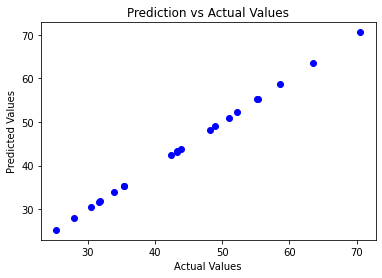

In [12]:
# Plot results
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color='b')
plt.title("Prediction vs Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [13]:
# Difference between test values and predicted values
pred_y_diff = pd.DataFrame({'Actual Values':y_test, 'Predicted Values':y_pred, 'Difference':y_pred-y_test})
pred_y_diff[:20]

,Actual Values,Predicted Values,Difference
0,35.417055,35.417055,-1.867306e-10
1,43.210089,43.210089,-2.710294e-10
2,33.929797,33.929797,9.688463e-10
3,58.626995,58.626995,-1.356497e-10
4,42.324573,42.324573,5.249632e-10
5,52.253195,52.253195,-2.255049e-10
6,27.897271,27.897271,1.401688e-10
7,43.898294,43.898294,5.027658e-10
8,31.675469,31.675469,-1.630966e-09
9,51.009006,51.009006,-3.018670e-10


## Polynomial Regression

In [14]:
# Dataset 
data1.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [15]:
import numpy as np
x = np.array(data1.loc[:,'pelvic_incidence']).reshape(-1,1)
y = np.array(data1.loc[:,'sacral_slope']).reshape(-1,1)

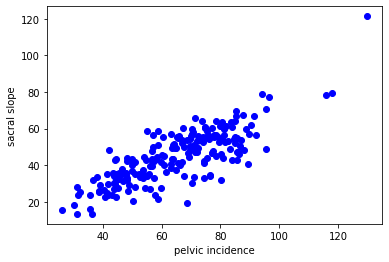

In [16]:
# Scatter data
plt.scatter(x, y, color='b')
plt.xlabel('pelvic incidence')
plt.ylabel('sacral slope')
plt.show()

In [18]:
# Split data into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)
print("x train: \n", x_train)
print("\n\n")
print("y train: \n", y_train)

x train: 
 [[ 44.31890674]
 [ 45.36675362]
 [ 47.65772963]
 [ 85.35231529]
 [ 52.20469309]
 [ 48.06062649]
 [ 74.71722805]
 [ 57.03509717]
 [ 91.46874146]
 [ 70.22145219]
 [ 79.24967118]
 [ 72.05403412]
 [ 86.90079431]
 [ 60.419932  ]
 [ 85.64378664]
 [ 67.02766447]
 [ 65.53600255]
 [ 63.83498162]
 [ 77.12134424]
 [ 86.472905  ]
 [ 63.07361096]
 [ 77.40933294]
 [ 89.5049473 ]
 [ 49.71285934]
 [ 72.2223343 ]
 [ 88.0244989 ]
 [ 56.03021778]
 [ 77.69057712]
 [ 63.17298709]
 [ 26.14792141]
 [ 79.93857026]
 [ 56.99140382]
 [ 74.85448008]
 [ 43.79019026]
 [ 35.49244617]
 [ 68.61300092]
 [ 70.67689818]
 [ 77.23689752]
 [ 63.90063261]
 [ 95.48022873]
 [ 78.42595126]
 [ 86.75360946]
 [ 89.68056731]
 [ 36.12568347]
 [ 50.81926781]
 [ 74.37767772]
 [ 43.34960621]
 [ 57.28694488]
 [ 71.18681115]
 [ 41.72996308]
 [ 44.21646446]
 [ 50.06678595]
 [ 41.17167989]
 [ 95.38259648]
 [ 74.43359316]
 [ 75.43774787]
 [ 60.62621697]
 [ 65.01377322]
 [ 85.09550254]
 [ 84.99895554]
 [ 71.00194076]
 [ 74.7207462

In [20]:
# Prepare polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)
x_train_poly

array([[1.00000000e+00, 4.43189067e+01, 1.96416549e+03],
       [1.00000000e+00, 4.53667536e+01, 2.05814233e+03],
       [1.00000000e+00, 4.76577296e+01, 2.27125919e+03],
       [1.00000000e+00, 8.53523153e+01, 7.28501773e+03],
       [1.00000000e+00, 5.22046931e+01, 2.72532998e+03],
       [1.00000000e+00, 4.80606265e+01, 2.30982382e+03],
       [1.00000000e+00, 7.47172281e+01, 5.58266417e+03],
       [1.00000000e+00, 5.70350972e+01, 3.25300231e+03],
       [1.00000000e+00, 9.14687415e+01, 8.36653066e+03],
       [1.00000000e+00, 7.02214522e+01, 4.93105235e+03],
       [1.00000000e+00, 7.92496712e+01, 6.28051038e+03],
       [1.00000000e+00, 7.20540341e+01, 5.19178383e+03],
       [1.00000000e+00, 8.69007943e+01, 7.55174805e+03],
       [1.00000000e+00, 6.04199320e+01, 3.65056818e+03],
       [1.00000000e+00, 8.56437866e+01, 7.33485819e+03],
       [1.00000000e+00, 6.70276645e+01, 4.49270780e+03],
       [1.00000000e+00, 6.55360026e+01, 4.29496763e+03],
       [1.00000000e+00, 6.38349

In [22]:
# Train Model
from sklearn.linear_model import LinearRegression
PolyReg = LinearRegression()
PolyReg.fit(x_train_poly, y_train)
coefficient = PolyReg.coef_
intercept = PolyReg.intercept_
print("coefficient = ", coefficient)
print("intercept = ", intercept)

coefficient =  [[0.         0.38177315 0.00200968]]
intercept =  [11.44917605]


In [23]:
# Evaluate Model
y_pred = PolyReg.predict(x_test_poly)
y_pred

array([[34.93244055],
       [52.83478423],
       [29.21393223],
       [30.07145861],
       [58.91336456],
       [55.63195831],
       [48.34221557],
       [54.9056707 ],
       [56.02320539],
       [30.58284427],
       [36.09541934],
       [54.48566774],
       [35.68430132],
       [31.98070603],
       [67.12603993],
       [41.45673467],
       [49.78798029],
       [27.64160889],
       [53.79674356],
       [29.23255061],
       [44.63292458]])

In [24]:
# Calculate scores
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.693130101765449

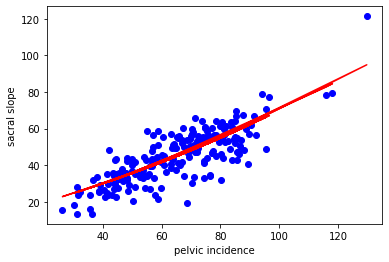

In [27]:
# Plot Model
import matplotlib.pyplot as plt
response = intercept + coefficient[0,1] * x + coefficient[0,2] * x**2
plt.scatter(x, y, color='b')
plt.plot(x, response, color='r')
plt.xlabel("pelvic incidence")
plt.ylabel("sacral slope")
plt.show()